In [1]:
import warnings

warnings.filterwarnings(
    "ignore",
    message="The default behavior of tarfile extraction",
    category=RuntimeWarning,
)

:::{admonition} Under development
:class: warning
This currently contains examples of the earlier MAD synthesis, but we have yet to reproduce it using `plenoptic`.
:::

:::{admonition} Download
:class: important

Download this notebook: **{nb-download}`Original_MAD.ipynb`**!

:::

# Reproducing Wang and Simoncelli, 2008 (MAD Competition)

Goal here is to reproduce original MAD Competition results, as generated using the [matlab code](https://github.com/LabForComputationalVision/MAD_Competition) originally provided by Zhou Wang and then modified by the authors. MAD Competition is a synthesis method for efficiently computing two models, by generating sets of images that minimize/maximize one model's loss while holding the other's constant. For more details, see the [](mad-nb) and [](mad-concept) notebooks.

In [2]:
import plenoptic as po


%load_ext autoreload
%autoreload 2

# Download some data we'll need for this notebook
import contextlib
import os

from plenoptic.data.fetch import fetch_data

# the contextlib.redirect_stderr here is so that we don't print out the progressbar.
# If you would like to see it, remove this line.
with contextlib.redirect_stderr(open(os.devnull, "w")):
    fetch_data("MAD_results.tar.gz")
    fetch_data("ssim_images.tar.gz")

## SSIM

Before we discuss MAD Competition, let's look a little at SSIM, since that's the metric used in the original paper, and which we'll be using here. Important to remember that SSIM is a similarity metric, so higher is better, and thus a value of 1 means the images are identical and it's bounded between 0 and 1.

We have tests to show that this matches the output of the MATLAB code, won't show here.

In [3]:
img1 = po.data.einstein()
img2 = po.data.curie()
noisy = po.tools.add_noise(img1, [2, 4, 8])

We can see that increasing the noise level decreases the SSIM value, but not linearly

In [4]:
po.metric.ssim(img1, noisy)

/mnt/home/wbroderick/plenoptic-clean/src/plenoptic/metric/perceptual_distance.py:87: UserWarning: Image range falls outside [0, 1]. SSIM output may not make sense.
  warnings.warn(


tensor([[0.0031],
        [0.0015],
        [0.0005]])

And that our noise level does match the MSE

In [5]:
po.metric.mse(img1, noisy)

tensor([[2.0000],
        [4.0000],
        [8.0000]])

## MAD Competition

The following figure shows the results of MAD Competition synthesis using the original MATLAB code. It shows the original image in the top left. We then added some Gaussian noise (with a specified standard error) to get the image right below it. The four images to the right of that are the MAD-synthesized images. The first two have the same mean-squared error (MSE) as the first image (and each other), but the best and worst SSIM value (SSIM is a similarity metric, so higher is better), while the second two have the same SSIM as the first image, but the best and worst MSE. By comparing these images, we can get a sense for what MSE and SSIM consider important for image quality.

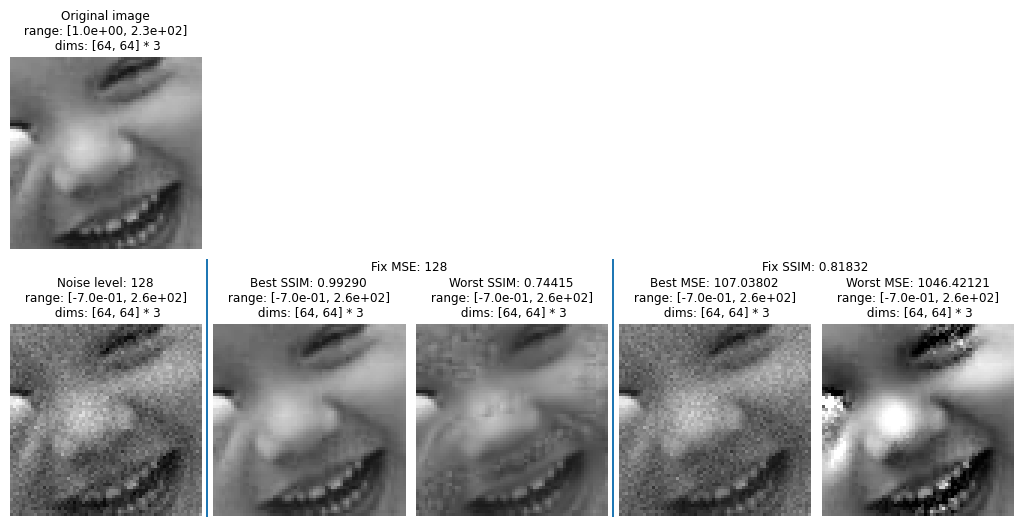

In [6]:
# We need to download some additional data for this portion of the notebook.
# In order to do so, we use an optional dependency, pooch. If the following raises an
# ImportError or ModuleNotFoundError then install pooch in your plenoptic
# environment and restart your kernel.
fig, results = po.tools.external.plot_MAD_results("samp6", [128], vrange="row1", zoom=3)

There's lots of info here, on the outputs of the MATLAB synthesis. We will later add stuff to investigate this using `plenoptic`.

In [7]:
results

{'L128': {'FIX_MSE': 127.99999999999999,
  'FIX_SSIM': 0.8183184633106257,
  'mse_fixmse_maxssim': array([128., 128., 128., 128., 128., 128., 128., 128., 128., 128., 128.,
         128., 128., 128., 128., 128., 128., 128., 128., 128., 128., 128.,
         128., 128., 128., 128., 128., 128., 128., 128., 128., 128., 128.,
         128., 128., 128., 128., 128., 128., 128., 128., 128., 128., 128.,
         128., 128., 128., 128., 128., 128., 128., 128., 128., 128., 128.,
         128., 128., 128., 128., 128., 128., 128., 128., 128., 128., 128.,
         128., 128., 128., 128., 128., 128., 128., 128., 128., 128., 128.,
         128., 128., 128., 128., 128., 128., 128., 128., 128., 128., 128.,
         128., 128., 128., 128., 128., 128., 128., 128., 128., 128., 128.,
         128.]),
  'ssim_fixmse_maxssim': array([0.82669306, 0.83641599, 0.84768936, 0.86021352, 0.87332037,
         0.8861153 , 0.89794336, 0.90864194, 0.91828312, 0.9270046 ,
         0.93495769, 0.94226293, 0.94896492, 0.955